# Hanga!

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

## Hanga taupori

In [234]:
def hanga_taupori(size=100, wip_mean=1000, wip_std=100, prop_min=0.05, lead_mean=14, lead_std=7, prop=0.1, name='anon', plot=True):
    wip = np.clip(np.random.normal(wip_mean, wip_std, size=size), 0, wip_mean+3*wip_std)
    lead = np.clip(np.random.normal(lead_mean, lead_std, size=size), 0, lead_mean+3*lead_std)
    prop = np.ones(size) * prop
    matrix = np.stack([wip, lead, prop], axis=1)
    df = pd.DataFrame(matrix, columns=['wip', 'lead', 'prop'])
    df['name'] = name
    if plot:
        sns.scatterplot(data=df, x='lead', y='wip', hue='name')
        plt.show()
    return df

In [235]:
interactive(hanga_taupori)

interactive(children=(IntSlider(value=100, description='size', max=300, min=-100), IntSlider(value=1000, descr…

Size 150


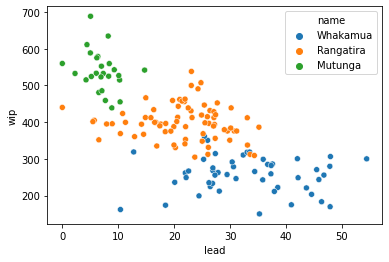

In [347]:
pop1 = hanga_taupori(size=50, wip_mean = 250, wip_std=50, lead_mean=35, lead_std=10, prop=0.1, name='Whakamua', plot=False)
pop2 = hanga_taupori(size=75, wip_mean = 400, wip_std=50, lead_mean=21, lead_std=7, prop=0.05, name='Rangatira', plot=False)
pop3 = hanga_taupori(size=25, wip_mean = 550, wip_std=50, lead_mean=7, lead_std=3, prop=0.05, name='Mutunga', plot=False)
pop = pd.concat([pop1, pop2, pop3])
sns.scatterplot(data=pop, x='lead', y='wip', hue='name')
print('Size', len(pop))
plt.show()

## Hanga hoko


In [348]:
def hanga_hoko(pop, days=5*7, rate=50.0, delta=0.0, plot=True, name='anon'):
    hist = []
    revenue = 0
    for day in range(days):
        dtd = days - day
        rolls = np.random.uniform()
        sales = float(len(pop[(pop.wip >= rate) & (pop.lead >= dtd) & pop.prop >= rolls]))
        revenue += rate*sales
        hist.append((day, rate, sales, revenue))
        rate += delta
    data = np.array(hist)
    df = pd.DataFrame(data, columns=['day', 'rate', 'sales', 'revenue'])
    df['name'] = name
    return df

Size 175


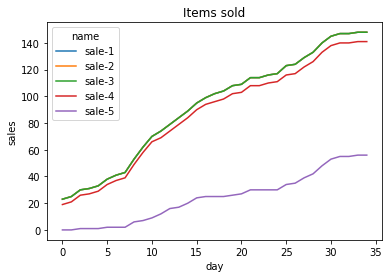

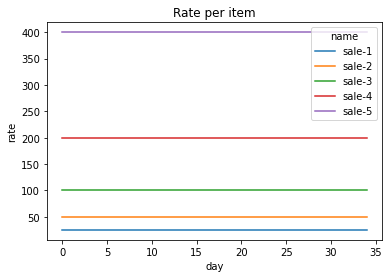

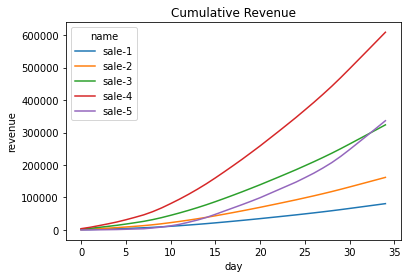

In [396]:
sale1 = hanga_hoko(pop, rate=25, name='sale-1')
sale2 = hanga_hoko(pop, rate=50, name='sale-2')
sale3 = hanga_hoko(pop, rate=100, name='sale-3')
sale4 = hanga_hoko(pop, rate=200, name='sale-4')
sale5 = hanga_hoko(pop, rate=400, name='sale-5')
sales = pd.concat([sale1, sale2, sale3, sale4, sale5])

print('Size', len(sales))

sns.lineplot(data=sales, x='day', y='sales', hue='name')
plt.title('Items sold')
plt.show()

sns.lineplot(data=sales, x='day', y='rate', hue='name')
plt.title('Rate per item')
plt.show()

sns.lineplot(data=sales, x='day', y='revenue', hue='name')
plt.title('Cumulative Revenue')
plt.show()


## Whakangaro !

In [397]:
def whakangaro(df, nan_frac=1.0, alter_frac=1.0, alter_val=-100):
    df_damage = df.copy()
    idx = df_damage.index.values
    cols = df_damage.columns.values
    numeric_cols = df_damage.select_dtypes(include=[np.number]).columns.values
    
    # nan whakangaro
    n_nan = int(np.floor(len(df_damage) * nan_frac))
    rows = np.random.choice(idx, replace=False, size=n_nan)
    cols = np.random.choice(cols, replace=True, size=n_nan)
    for i,j in zip(rows, cols):
        df_damage.at[i,j] = np.nan

    # alter whakangaro
    n_alter = int(np.floor(len(df_damage) * alter_frac))
    rows = np.random.choice(idx, replace=False, size=n_nan)
    cols = np.random.choice(numeric_cols, replace=True, size=n_nan)
    for i, j in zip(rows, cols):
        df_damage.at[i, j] = alter_val
    
    return df_damage

In [401]:
pop_sample = pop.sample(n=25)
sales_damaged = whakangaro(sales, nan_frac=0.05, alter_frac=0.07)
print(len(pop_sample))
print(len(sales_damaged))

25
175


In [402]:
pop_sample

,wip,lead,prop,name
58,375.920913,31.168850,0.05,Rangatira
13,361.593462,25.397373,0.10,Whakamua
5,542.789824,9.288403,0.05,Mutunga
69,368.597395,25.168964,0.05,Rangatira
37,255.736386,27.291460,0.10,Whakamua
0,278.452003,30.602029,0.10,Whakamua
15,335.095220,16.888707,0.05,Rangatira
4,350.654385,25.972887,0.10,Whakamua
42,309.226732,34.329563,0.05,Rangatira
35,379.502794,28.961290,0.05,Rangatira


In [403]:
sales_damaged

,day,rate,sales,revenue,name
0,0.0,25.0,23.0,575.0,sale-1
1,1.0,25.0,25.0,1200.0,sale-1
2,2.0,25.0,30.0,1950.0,sale-1
3,3.0,25.0,31.0,2725.0,sale-1
4,4.0,25.0,33.0,3550.0,sale-1
...,...,...,...,...,...
30,30.0,400.0,-100.0,247600.0,sale-5
31,-100.0,400.0,NaN,269600.0,sale-5
32,32.0,400.0,55.0,291600.0,sale-5
33,33.0,400.0,56.0,314000.0,sale-5


## Penapena :-)

In [404]:
pop_sample.to_csv('data/pop_sample.csv', index=False)
sales_damaged.to_csv('data/sales_damaged.csv', index=False)